In [1]:
import pandas as pd

df_cleaned = pd.read_csv("df_cleaned.csv")
df_cleaned.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
3,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
4,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [2]:
df_cleaned['income'] = df_cleaned['income'].apply(lambda x: 1 if x == '>50K' else 0)

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/1134911276.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_series.values, y=mi_series.index, palette="magma")
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/1134911276.py:23: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/1134911276.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("charts/week2_q1_mutual_info.png", bbox_inches="tight")
/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) mi

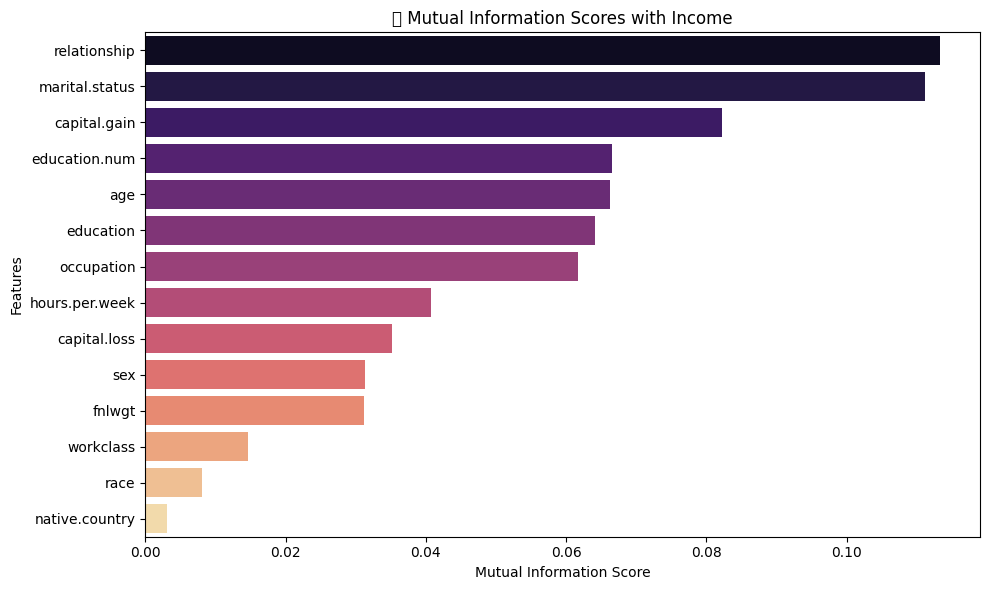

relationship      0.113348
marital.status    0.111118
capital.gain      0.082167
education.num     0.066564
age               0.066195
education         0.064178
occupation        0.061727
hours.per.week    0.040786
capital.loss      0.035148
sex               0.031380
fnlwgt            0.031137
workclass         0.014671
race              0.008061
native.country    0.003155
dtype: float64

In [3]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Encode categorical columns
df_encoded = df_cleaned.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('income', axis=1)
y = df_encoded['income']

mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette="magma")
plt.title("🔍 Mutual Information Scores with Income")
plt.xlabel("Mutual Information Score")
plt.ylabel("Features")
plt.tight_layout()
plt.savefig("charts/week2_q1_mutual_info.png", bbox_inches="tight")
plt.show()

mi_series

In [5]:
# Average hours worked per occupation group
occupation_avg_hours = df_cleaned.groupby('occupation')['hours.per.week'].mean().to_dict()

# Map that average to a new feature
df_fe['occupation_mean_hours'] = df_fe['occupation'].map(occupation_avg_hours)

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/985449936.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_fe, x='occupation_mean_hours', y='occupation', orient='h', palette='viridis')


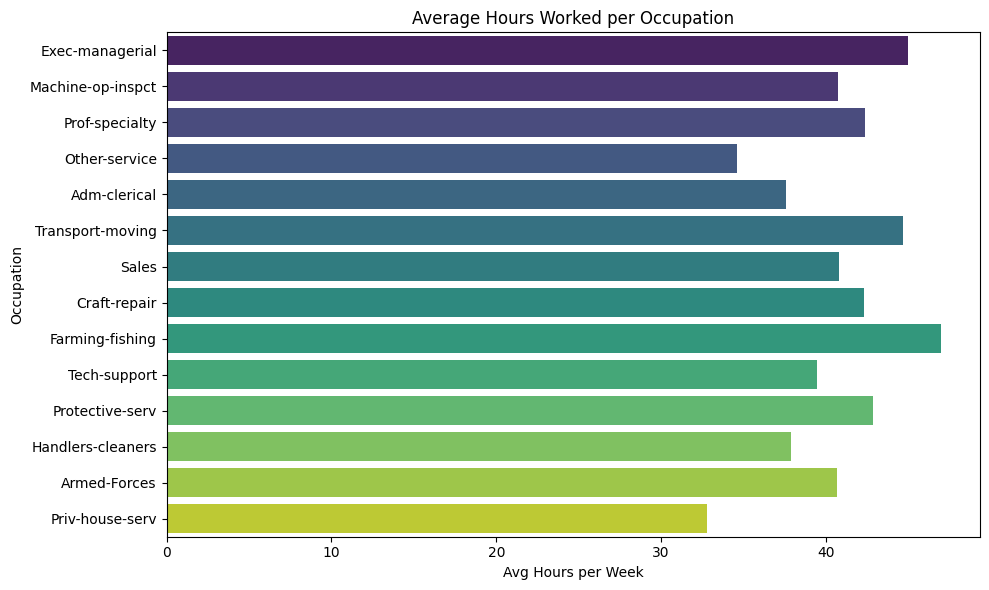

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=df_fe, x='occupation_mean_hours', y='occupation', orient='h', palette='viridis')
plt.title("Average Hours Worked per Occupation")
plt.xlabel("Avg Hours per Week")
plt.ylabel("Occupation")
plt.tight_layout()
plt.savefig("charts/week2_q2_avg_hours_by_occupation.png", bbox_inches='tight')
plt.show()

In [7]:
from sklearn.feature_selection import mutual_info_classif

# Prepare data
df_test = df_fe.copy()
X = df_test.drop(columns='income')
y = df_test['income']

# Convert all categoricals
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Compute mutual information
mi_scores = mutual_info_classif(X, y, discrete_features='auto')
mi_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display importance
print("📊 Mutual Information Scores:")
print(mi_series['occupation_mean_hours'])  # Just this feature

📊 Mutual Information Scores:
0.06846628320699621


/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/3028020080.py:18: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/3028020080.py:19: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("charts/week2_q2_heatmap_occupation_mean_hours.png", bbox_inches='tight')
/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


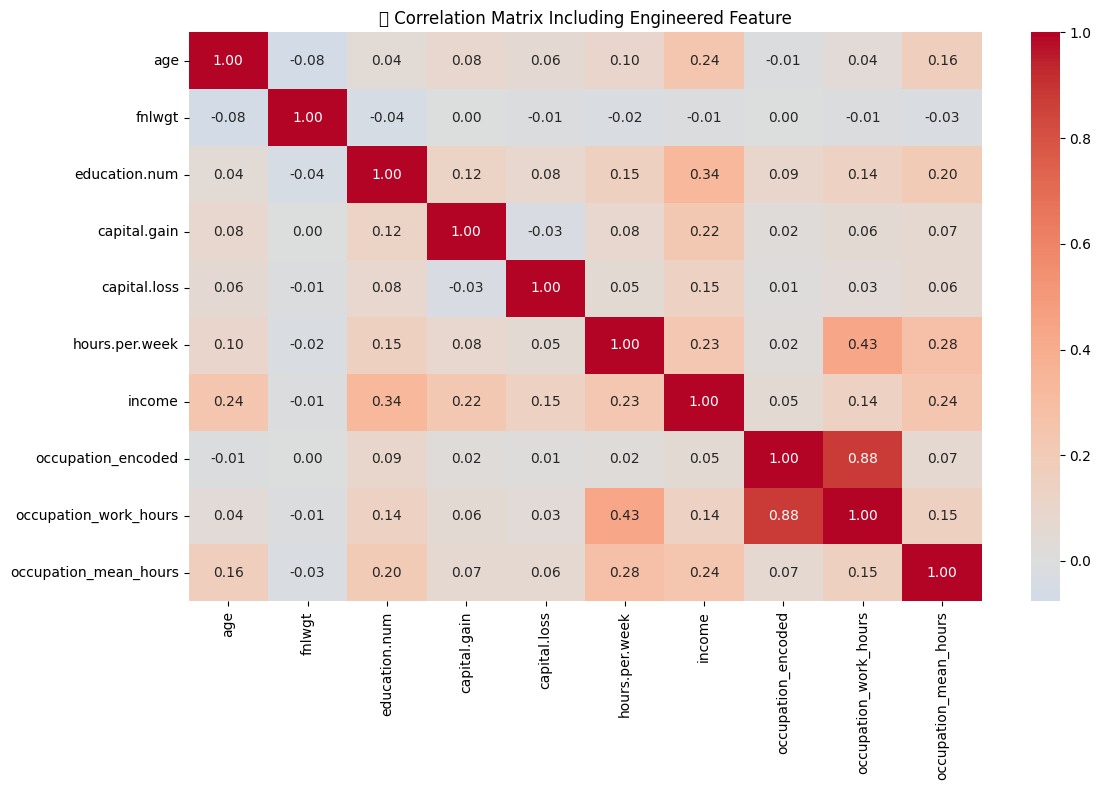

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Include the engineered feature
num_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Add only if not already present
if 'occupation_mean_hours' not in num_cols:
    num_cols.append('occupation_mean_hours')

# Compute correlation matrix
correlation_matrix = df_fe[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔍 Correlation Matrix Including Engineered Feature")
plt.tight_layout()
plt.savefig("charts/week2_q2_heatmap_occupation_mean_hours.png", bbox_inches='tight')
plt.show()

/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/1731146850.py:24: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/7z/5gvhbwl101g21n_ymwk1n0s40000gn/T/ipykernel_7364/1731146850.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig("charts/week2_q2_heatmap_engineered_features.png", bbox_inches='tight')
/Users/vimu/Documents/Data Science/SDS/Collaborative Project/SDS-CP034-incomeinsight/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


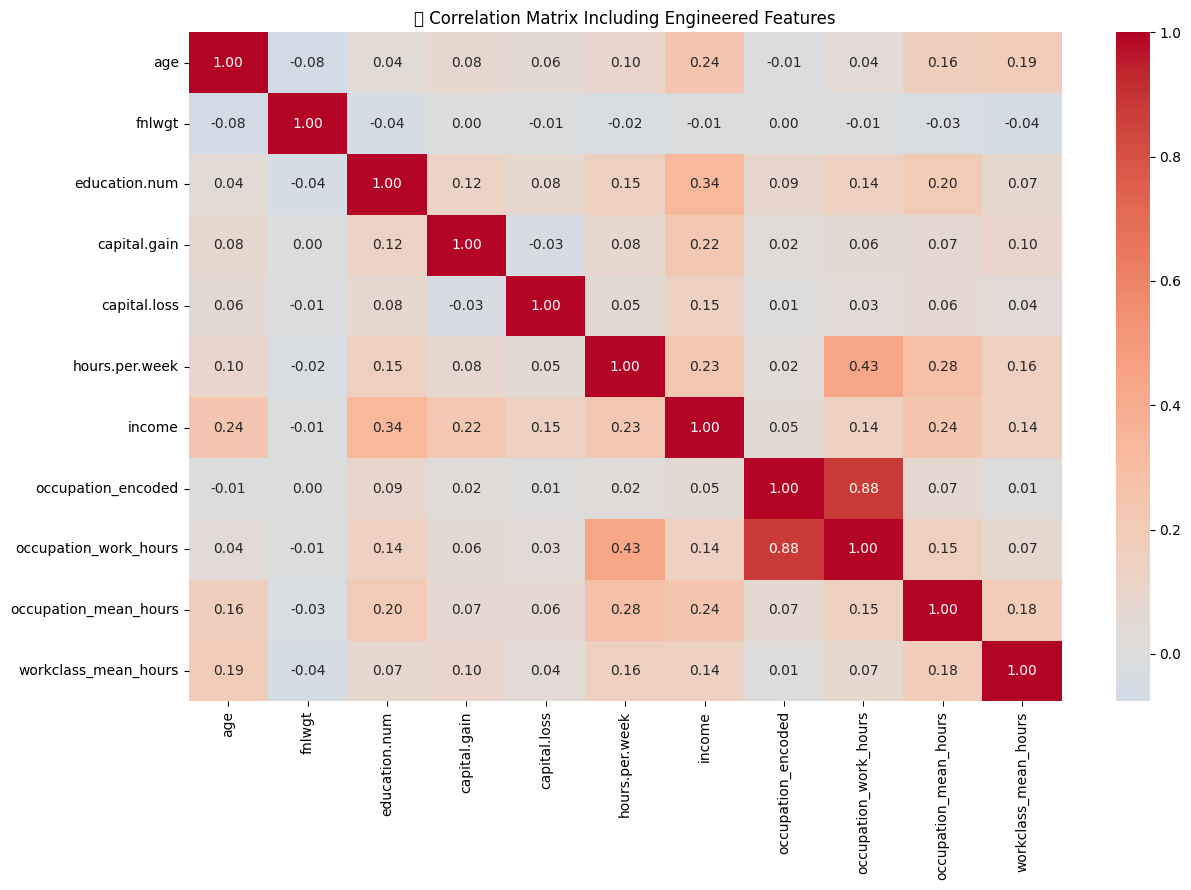

In [9]:
# 1. Compute average hours worked for each workclass
workclass_avg_hours = df_fe.groupby('workclass')['hours.per.week'].mean().to_dict()

# 2. Create new feature: workclass_mean_hours
df_fe['workclass_mean_hours'] = df_fe['workclass'].map(workclass_avg_hours)

# 3. Update numerical columns list to include engineered features
num_cols = df_fe.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'occupation_mean_hours' not in num_cols:
    num_cols.append('occupation_mean_hours')
if 'workclass_mean_hours' not in num_cols:
    num_cols.append('workclass_mean_hours')

# 4. Compute correlation matrix
correlation_matrix = df_fe[num_cols].corr()

# 5. Plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(13, 9))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("🔍 Correlation Matrix Including Engineered Features")
plt.tight_layout()
plt.savefig("charts/week2_q2_heatmap_engineered_features.png", bbox_inches='tight')
plt.show()